In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df_twitter = pd.read_csv("twcs.csv")
df_ticket = pd.read_csv("customer_support_tickets.csv")
df_bitext = pd.read_csv("Bitext_Sample_Customer_Service_Training_Dataset.csv")


In [3]:
df_twitter.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [4]:
df_ticket.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [5]:
df_bitext.head()

,flags,utterance,category,intent
0,BM,I have problems with canceling an order,ORDER,cancel_order
1,BIM,how can I find information about canceling ord...,ORDER,cancel_order
2,B,I need help with canceling the last order,ORDER,cancel_order
3,BIP,could you help me cancelling the last order I ...,ORDER,cancel_order
4,B,problem with cancelling an order I made,ORDER,cancel_order


In [6]:
df_twitter.isnull().sum()


tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

In [7]:
df_ticket.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [8]:
df_bitext.isnull().sum()

flags        0
utterance    0
category     0
intent       0
dtype: int64

In [9]:
df_bitext.columns

Index(['flags', 'utterance', 'category', 'intent'], dtype='object')

In [10]:
df_bitext["category"].value_counts()

category
ACCOUNT             1774
ORDER               1220
REFUND               904
INVOICE              648
PAYMENT              620
FEEDBACK             613
SHIPPING_ADDRESS     604
DELIVERY             603
CONTACT              596
CANCELLATION_FEE     298
NEWSLETTER           295
Name: count, dtype: int64

In [11]:
df_bitext["intent"].value_counts()

intent
get_invoice                 324
check_invoice               324
payment_issue               323
review                      315
track_refund                308
set_up_shipping_address     307
place_order                 306
track_order                 305
cancel_order                305
change_order                304
delivery_options            302
check_refund_policy         302
delivery_period             301
contact_customer_service    299
create_account              298
check_cancellation_fee      298
recover_password            298
complaint                   298
delete_account              298
check_payment_methods       297
change_shipping_address     297
contact_human_agent         297
registration_problems       296
newsletter_subscription     295
get_refund                  294
edit_account                294
switch_account              290
Name: count, dtype: int64

In [12]:
df_ticket.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [13]:
df_ticket['Ticket Priority'].value_counts()

Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64

In [14]:
df_bitext["message_len"] = df_bitext["utterance"].str.len()
df_bitext["word_count"] = df_bitext["utterance"].str.split().str.len()
print(df_bitext[['message_len','word_count']].describe())

       message_len   word_count
count  8175.000000  8175.000000
mean     42.565749     8.323914
std      10.578209     2.386044
min       6.000000     1.000000
25%      35.000000     7.000000
50%      43.000000     8.000000
75%      51.000000    10.000000
max      60.000000    15.000000


In [15]:
for category in ["ACCOUNT","ORDER","REFUND"]:
    examples = df_bitext[df_bitext["category"] == category]["utterance"].head(3)
    for msg in examples:
        print(msg)

how do i create a goddamn new account
i do not know what to do to open another online account
I do not know how to open a different account
I have problems with canceling an order
how can I find information about canceling orders?
I need help with canceling the last order
checking your refund policy
I don't know how I can check your money back policy
I want help to check in what cases can I ask for a refund


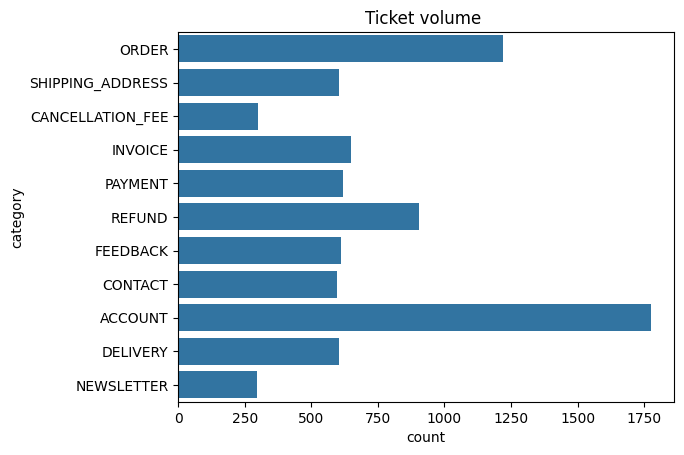

In [16]:
sns.countplot(y=df_bitext["category"])
plt.title("Ticket volume ")
plt.show()

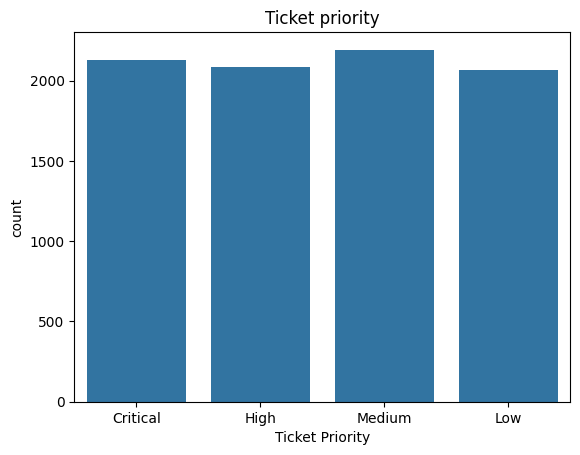

In [17]:
sns.countplot(x=df_ticket["Ticket Priority"],order=["Critical", "High", "Medium", "Low"])
plt.title("Ticket priority")
plt.show()

In [18]:
def extract_all_features(text):
    text = str(text).lower()
    words = text.split()
    urgency_words = ["urgent","asap","critical","immediately","help","emergency"]
    account_words = ["account","login","password","access","profilr","settings","sign"]
    order_words = ["order", "purchase", "buy", "item", "product", "shopping", "cart"]
    refund_words = ["refund", "return", "money back", "reimburse", "get back"]
    invoice_words = ["invoice", "bill", "receipt", "statement", "billing"]
    payment_words = ["payment", "pay", "card", "transaction", "charge", "money"]
    delivery_words = ["delivery", "shipping", "ship", "package", "tracking", "courier"]
    contact_words = ["contact", "phone", "email", "support", "help", "reach"]
    cancel_words = ["cancel", "cancellation", "fee", "penalty"]
    feedback_words = ["feedback", "review", "rating", "opinion", "suggestion"]
    newsletter_words = ["newsletter", "unsubscribe", "mailing", "subscription"]
    address_words = ["address", "shipping address", "wrong address", "delivery address"]
    
    negative_emotions = ["angry", "frustrated", "disappointed", "upset", "hate", "mad"]


    feature =  {
    "char_len":len(text),
    "word_count":len(text.split()),
    "urgent_flag":int(any(word in text for word in urgency_words)),#any returns bool values to: int(any) to convert it to 0 or 1 
    "question_flag":int('?'in text),
    "exclamations":text.count("!"),
    "caps_ratio":sum(1 for c in text if c.isupper())/max(len(text),1),
    "account_score":sum(word in text for word in account_words),
    "order_score":sum(word in text for  word in order_words),
    "refund_score":sum(word in text for word in refund_words),
    "invoice_score": sum(word in text for word in invoice_words),
    "payment_score":sum(word in text for word in payment_words ),
    "deliver_score":sum(word in text for word in delivery_words ),
    "contact_score":sum(word in text for word in contact_words),
    "cance_score":sum(word in text for word in cancel_words),
    "feedback_score":sum(word in text for word in feedback_words),
    "newsletter_score":sum(word in text for word in newsletter_words),
    "address_score":sum(word in text for word in address_words),



    "negative_emotions": sum(word in text for word in negative_emotions),
    "sentece_counts":text.count(",") + text.count("!") + text.count("?"),
    "avg_words_len": sum(len(word) for word in words )/max(len(words),1) 
    }
    return feature   

In [19]:
print("Bitext: ",df_bitext.columns)
print("Ticket :",df_ticket.columns)
print("Twitter :",df_twitter.columns)

Bitext:  Index(['flags', 'utterance', 'category', 'intent', 'message_len',
       'word_count'],
      dtype='object')
Ticket : Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')
Twitter : Index(['tweet_id', 'author_id', 'inbound', 'created_at', 'text',
       'response_tweet_id', 'in_response_to_tweet_id'],
      dtype='object')


In [20]:
df_bitext_feature = pd.DataFrame([extract_all_features(text) for text in df_bitext["utterance"]])
df_bitext = pd.concat([df_bitext,df_bitext_feature],axis=1)

df_ticket_feature = pd.DataFrame([extract_all_features(text) for text in df_ticket["Ticket Description"]])
df_ticket = pd.concat([df_ticket,df_ticket_feature],axis=1)

df_twitter_feature = pd.DataFrame([extract_all_features(text) for text in df_twitter["text"]])
df_twitter = pd.concat([df_twitter,df_twitter_feature],axis=1)


In [21]:
df_bitext["category"].value_counts()

category
ACCOUNT             1774
ORDER               1220
REFUND               904
INVOICE              648
PAYMENT              620
FEEDBACK             613
SHIPPING_ADDRESS     604
DELIVERY             603
CONTACT              596
CANCELLATION_FEE     298
NEWSLETTER           295
Name: count, dtype: int64

In [22]:
df_bitext["intent"].value_counts().head(10)

intent
get_invoice                324
check_invoice              324
payment_issue              323
review                     315
track_refund               308
set_up_shipping_address    307
place_order                306
track_order                305
cancel_order               305
change_order               304
Name: count, dtype: int64

In [23]:
df_ticket["Ticket Priority"].value_counts()

Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64

In [24]:
df_bitext_feature = pd.DataFrame([extract_all_features(text) for text in df_bitext["utterance"]])
df_bitext = pd.concat([df_bitext[["utterance","category"]],df_bitext_feature],axis=1)

In [25]:
feature_col = ["account_score","order_score","refund_score","invoice_score","payment_score","deliver_score","contact_score"]


for feature in feature_col:
    df_bitext.groupby("category")[feature].mean().sort_values(ascending=False)
df_bitext

,utterance,category,char_len,word_count,urgent_flag,question_flag,exclamations,caps_ratio,account_score,order_score,...,payment_score,deliver_score,contact_score,cance_score,feedback_score,newsletter_score,address_score,negative_emotions,sentece_counts,avg_words_len
0,I have problems with canceling an order,ORDER,39,7,0,0,0,0.0,0,1,...,0,0,0,1,0,0,0,0,0,4.714286
1,how can I find information about canceling ord...,ORDER,50,8,0,1,0,0.0,0,1,...,0,0,0,1,0,0,0,0,1,5.375000
2,I need help with canceling the last order,ORDER,41,8,1,0,0,0.0,0,1,...,0,0,1,1,0,0,0,0,0,4.250000
3,could you help me cancelling the last order I ...,ORDER,51,10,1,1,0,0.0,0,1,...,0,0,1,1,0,0,0,1,1,4.200000
4,problem with cancelling an order I made,ORDER,39,7,0,0,0,0.0,0,1,...,0,0,0,1,0,0,0,1,0,4.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8170,I need help to check if there is any updates o...,REFUND,57,13,1,0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,3.461538
8171,refund status,REFUND,13,2,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,6.000000
8172,how can I check the status of the refund?,REFUND,41,9,0,1,0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,3.666667
8173,help checking if there is anything wrong with ...,REFUND,55,10,1,0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,4.600000


In [26]:
# df_ticket.groupby("Ticket Priority")[feature_col].mean()
# df_ticket    

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
X = df_bitext[feature_col]
y = df_bitext["category"]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [29]:
X_train.shape

(6131, 7)

In [30]:
model = LogisticRegression()
model2 = RandomForestClassifier(n_estimators=100,random_state=42,class_weight="balanced")


model.fit(X_train,y_train)
model2.fit(X_train,y_train)


y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test,y_pred))
print()
print(classification_report(y_test,y_pred2))

                  precision    recall  f1-score   support

         ACCOUNT       0.98      0.63      0.77       449
CANCELLATION_FEE       0.88      0.18      0.30        78
         CONTACT       0.37      0.57      0.45       136
        DELIVERY       0.93      0.85      0.89       135
        FEEDBACK       0.27      0.69      0.39       154
         INVOICE       1.00      1.00      1.00       172
      NEWSLETTER       0.00      0.00      0.00        72
           ORDER       0.94      0.98      0.96       328
         PAYMENT       1.00      0.98      0.99       165
          REFUND       1.00      1.00      1.00       213
SHIPPING_ADDRESS       1.00      0.89      0.94       142

        accuracy                           0.78      2044
       macro avg       0.76      0.71      0.70      2044
    weighted avg       0.84      0.78      0.78      2044


                  precision    recall  f1-score   support

         ACCOUNT       0.98      0.63      0.77       449
CANCELLAT

c:\Users\Kalash Srivastava\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kalash Srivastava\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kalash Srivastava\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [33]:
from sklearn.metrics import accuracy_score

score1 = accuracy_score(y_test,y_pred)
score2 = accuracy_score(y_test,y_pred2)
print("logistic regression accuracy: ",score1)
print("random forest accuracy: ",score2)

logistic regression accuracy:  0.7773972602739726
random forest accuracy:  0.7783757338551859


In [40]:
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [36]:
from xgboost import XGBClassifier

In [43]:
xgb_model = XGBClassifier(n_estimators = 100,max_depth=4,learning_rate = 0.1,eval_metric = "mlogloss",objective="multi:softprob",random_state=42)
xgb_model.fit(X_train,y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [45]:
xgb_pred = xgb_model.predict(X_test)

In [54]:
print(classification_report(y_test_encoded,xgb_pred))
print(accuracy_score(y_test_encoded,xgb_pred))

              precision    recall  f1-score   support

           0       0.98      0.63      0.77       449
           1       0.88      0.18      0.30        78
           2       0.37      0.57      0.45       136
           3       0.95      0.85      0.90       135
           4       0.27      0.69      0.39       154
           5       1.00      1.00      1.00       172
           6       0.00      0.00      0.00        72
           7       0.94      0.98      0.96       328
           8       1.00      0.98      0.99       165
           9       1.00      1.00      1.00       213
          10       1.00      0.89      0.94       142

    accuracy                           0.78      2044
   macro avg       0.76      0.71      0.70      2044
weighted avg       0.84      0.78      0.79      2044

0.7783757338551859


c:\Users\Kalash Srivastava\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kalash Srivastava\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kalash Srivastava\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [ ]:
def savings (y_test,y_pred):

    total_tickets = len(y_test)
    correct_pred = sum(y_test==y_pred)
    accuracy = correct_pred/total_tickets

    hours_per_ticket = 2
    hourly_wage = 100

    hours_saved = correct_pred*hours_per_ticket
    money_saved = hours_saved*hourly_wage

    print(f"Test Dataset Size: {total_tickets} tickets")
    print(f"Correct Predictions: {correct_pred}")
    print(f"Actual Accuracy: {accuracy:.1%}")
    print(f"Hours Saved: {hours_saved} hours")
    print(f"Money Saved Montly: {money_saved:,.0f}")
    print("-" * 50)

savings(y_test_encoded,xgb_pred)

Test Dataset Size: 2044 tickets
Correct Predictions: 1591
Actual Accuracy: 77.8%
Hours Saved: 3182 hours
Money Saved Montly: 318,200
--------------------------------------------------


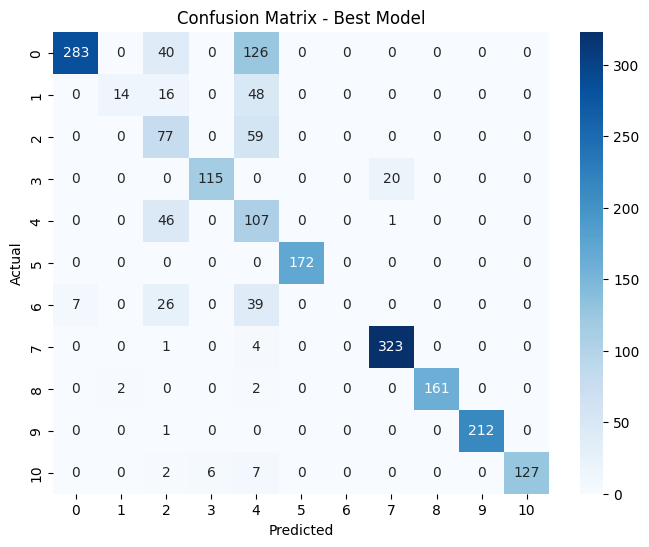

In [65]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_encoded, xgb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Best Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()